In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json
import glob

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [4]:
coco = COCO("datasets/pascal_train.json")

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [5]:
coco.cats # check the category

{1: {'supercategory': 'aeroplane', 'name': 'aeroplane', 'id': 1},
 2: {'supercategory': 'bicycle', 'name': 'bicycle', 'id': 2},
 3: {'supercategory': 'bird', 'name': 'bird', 'id': 3},
 4: {'supercategory': 'boat', 'name': 'boat', 'id': 4},
 5: {'supercategory': 'bottle', 'name': 'bottle', 'id': 5},
 6: {'supercategory': 'bus', 'name': 'bus', 'id': 6},
 7: {'supercategory': 'car', 'name': 'car', 'id': 7},
 8: {'supercategory': 'cat', 'name': 'cat', 'id': 8},
 9: {'supercategory': 'chair', 'name': 'chair', 'id': 9},
 10: {'supercategory': 'cow', 'name': 'cow', 'id': 10},
 11: {'supercategory': 'diningtable', 'name': 'diningtable', 'id': 11},
 12: {'supercategory': 'dog', 'name': 'dog', 'id': 12},
 13: {'supercategory': 'horse', 'name': 'horse', 'id': 13},
 14: {'supercategory': 'motorbike', 'name': 'motorbike', 'id': 14},
 15: {'supercategory': 'person', 'name': 'person', 'id': 15},
 16: {'supercategory': 'pottedplant', 'name': 'pottedplant', 'id': 16},
 17: {'supercategory': 'sheep', 'n

In [6]:
# The keys in coco.imgs (dictionary) can be used to track each image
print(list(coco.imgs.keys())[:20])
print(coco.imgs[736])

[736, 1392, 890, 1178, 1065, 265, 410, 806, 982, 272, 15, 766, 734, 227, 649, 373, 222, 351, 765, 425]
{'file_name': '2009_001816.jpg', 'id': 736, 'height': 375, 'width': 500}


In [8]:
imgIds = 5 # Use the key above to retrieve information of the image
img_info = coco.loadImgs(ids=imgIds)
print(img_info)

[{'file_name': '2007_000129.jpg', 'id': 5, 'height': 500, 'width': 334}]


In [36]:
catIds = coco.getCatIds(catNms=['bicycle']); # Return the category id by given class names
imgIds = coco.getImgIds(catIds=catIds) # Find all the image ids contain the catId
select_id = imgIds[3]
img = coco.loadImgs(ids=select_id)[0]

In [37]:
print(img)

{'file_name': '2007_000129.jpg', 'id': 5, 'height': 500, 'width': 334}


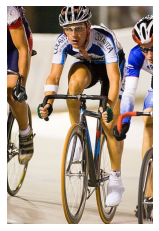

In [38]:
I = cv2.imread(img['file_name'])
plt.axis('off')
plt.imshow(I[:,:,::-1])
plt.show()

In [39]:
# Use the imgIds to find all instance ids of the image
annids = coco.getAnnIds(imgIds=select_id)
print(annids)

[9, 10, 11, 12, 13, 14]


In [40]:
anns = coco.loadAnns(annids)
print("Number of instances: ", len(annids))

Number of instances:  6


In [41]:
instance_id = 0
print(anns[instance_id].keys()) # check the information of the first instance of the image

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


In [42]:
print("Polygons of segmenatation:      ", anns[instance_id]['segmentation'][0][:18])
print("Image id of this instance:      ", anns[instance_id]['image_id'])
print("Bounding box of this instance:  ", anns[instance_id]['bbox'])
print("Category_id:                    ", anns[instance_id]['category_id'])

Polygons of segmenatation:       [90, 257, 88, 259, 89, 260, 89, 261, 91, 263, 92, 263, 94, 261, 93, 260, 93, 259]
Image id of this instance:       5
Bounding box of this instance:   [79, 203, 173, 297]
Category_id:                     2


## Visualization

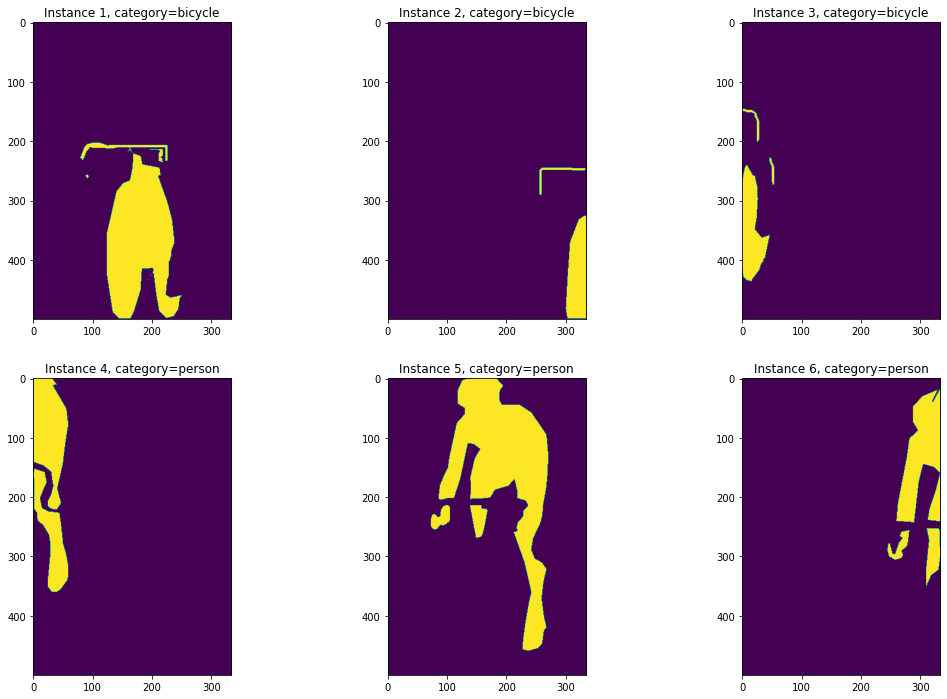

In [46]:
plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i in range(len(annids)):
    mask = coco.annToMask(anns[i])
    cate = anns[i]['category_id']
    plt.subplot(2, 3, i+1)
    plt.title("Instance {}, category={}".format(i+1, coco.cats[cate]['name']))
    plt.imshow(mask)

## Exercise1 
- What's the encoding of bounding box? (xyxy, yxyx, xywh)
- What are the category ids in this image?
- What's the pixel area for each instance?